# Jupyter Notebooks and Data Visualization

A jupyter notebook is a document that is cabale of displaying and executing python code alongside plain text. This document--and the document used earlier in the Data Science curriculum--are both examples of jupyter notebooks. The notebook is held in an `.ipynb` file (a 'notebook'), and is opened from a locally hosted server in your browser. To get our environment set up, let's first start a virtual environment in our terminal:

```
$ python -m venv visualization
$ source visualization/bin/activate
```

Then, let's start up a jupyter server by running `jupyter notebook` in our terminal. This will open the jupyter GUI in your browser. There, let's hit `new` and select Python3 from the dropown menu. We now have a jupyter notebook with a Python kernel--you can look in the folder you ran `jupyter notebook` in and observe that a new `.ipynb` file has been created there.

Now we need to install the necessary libraries. Create a new code cell in your jupyter notebook and run the following:

In [48]:
import pandas as pd
import seaborn as sb
from  matplotlib import pyplot as plt

From now on, we will be running all our code in new code cells a bit at a time; the main benefit of jupyter is that we don't need to run our whole file at once, so let's take advantage of this!

## Reading in Data
Now we want to find some data to read in--our csv of iris data should be good. We can use pandas' read_csv method to put our data into a dataframe:

In [49]:
iris = pd.read_csv("Iris.csv")

Let's make sure out data is loaded correctly by calling pandas' "head" method, which displays the first five rows of a dataframe:

In [50]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


One thing we might want to do with other data sets, potentially to clarify what variable is being observed or maybe even just because we like another name more. We can use the rename function in Pandas to do this. If we want Id to read as IrisId, we simply run:

In [51]:
iris.rename(columns={'Id':'IrisId'}, inplace=True)
iris.head()

,IrisId,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Easy! To clarify, we used `inplace=True` to specify that our change is being made on the original dataframe and is not being saved as a new object.
## Simple Description
Let's think of our work today as being motivated by a simple mission; we want to be able to identify interesting or unusual trends in our data, trends which might allow us to build predictive tools based on our data. One thing we might want to be able to with this data is predict the species of an iris based on it petal length, petal width, sepal length, and sepal width. Let's start, however, with some basic summary statistics.

We can get summary statistics of the characters of our irises using pandas's `describe()` method.

In [52]:
iris.describe()

,IrisId,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


We can do this for just one of our species by selecting only observations where the 'Species' value matches the one we want. For example,

In [53]:
iris[iris.Species=='Iris-setosa'].describe()

,IrisId,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,25.50000,5.00600,3.418000,1.464000,0.24400
std,14.57738,0.35249,0.381024,0.173511,0.10721
min,1.00000,4.30000,2.300000,1.000000,0.10000
25%,13.25000,4.80000,3.125000,1.400000,0.20000
50%,25.50000,5.00000,3.400000,1.500000,0.20000
75%,37.75000,5.20000,3.675000,1.575000,0.30000
max,50.00000,5.80000,4.400000,1.900000,0.60000


It looks like we forgot that the leftmost column is reserved for ids for each individual iris--not very interesting data considering it's just range(1,150). Let's create a more suitable dataframe by dropping the id column and then look at that dataframe's `description()`.

In [54]:
irisCleaned = iris.drop('IrisId', axis=1)
irisCleaned[irisCleaned.Species=='Iris-setosa'].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


Here we have summary statstics for each variable; if we wanted to show summary statistics by variable for each individual species, it would be a simple matter of grouping by column "Species" and running `describe()` once more.

In [55]:
irisCleaned.groupby("Species").describe()

SepalLengthCm                                              \
                        count   mean       std  min    25%  50%  75%  max   
Species                                                                     
Iris-setosa              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor          50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica           50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                SepalWidthCm         ... PetalLengthCm      PetalWidthCm  \
                       count   mean  ...           75%  max        count   
Species                              ...                                   
Iris-setosa             50.0  3.418  ...         1.575  1.9         50.0   
Iris-versicolor         50.0  2.770  ...         4.600  5.1         50.0   
Iris-virginica          50.0  2.974  ...         5.875  6.9         50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

We unfortunately can't see all our data; if we wanted to get summary statstics for every variable for every Species all on the same page, we would most likely have to do each variable seperately. In any case, it still wouldn't tell us much--numbers don't give us a great idea of the real differences between observations, at least not at first glance. If we want to look at each individual point as part of the whole, what we want is a nice visualization for our data that gives us information at a glance.

## Simple Visualization

So far, all we've done is dataframe manipulation in pands. This looks fine, but what we really want to do is present our data visually and in an easy-to understand way. We'd much rather look at a graph than a bunch of numbers, so our next step is to produce a scatterplot of our data. Remember, a scatterplot labels the x and y axes with aspects of our data and then puts a dot where each individual iris falls. For our first comparison, we want to see Sepal Length on the x-axis and Sepal Width on the y-axis. A relplot will allow us to show the relationship between two categories of quantitative data.

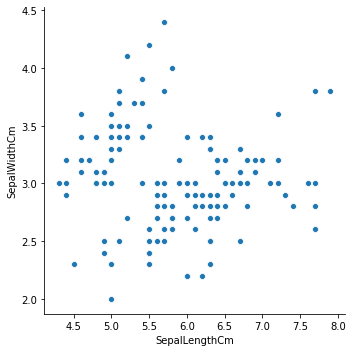

In [56]:
sb.relplot(data=iris, x='SepalLengthCm', y='SepalWidthCm')

While this looks very convincing, it doesn't tell us much about the data we're dealing with. In fact, we are unable to infer anything about our data except that all our sepal lengths are between 4.5 and 8 centimeters, and all our sepal widths are between 2 and 4.5 centimeters. Let's add another aspect to our visualization by showing the species of each of our individual irises on our plot by coloring each point based on its species.

### Now, with color!

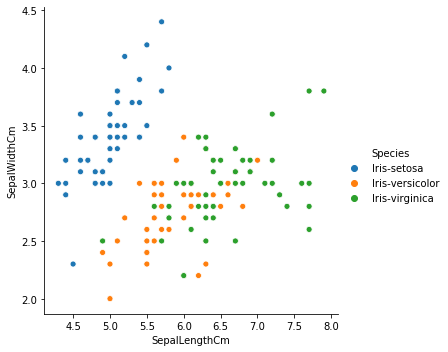

In [57]:
sb.relplot(data=iris, kind='scatter', x='SepalLengthCm', y='SepalWidthCm', hue='Species')

Seaborn makes coloring points by species very easy; all we have to specify is what column our color is going to be based on, and it takes care of the rest. Unfortunately, we have found a little bit of an issue with our visualization by coloring it--although it's pretty easy to tell whether an iris is a setosa based on this graph, there's a lot of overlap between versicolors and virginicas. We'll get into how we can discover this through machine learning later (!), but for right now let's have a look at some other graphical representations of our data.

## Box Plot

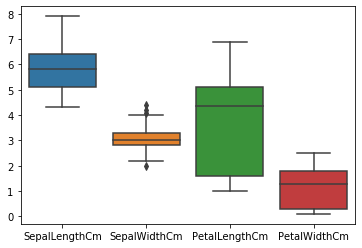

In [58]:
sb.boxplot(data=(iris.drop('IrisId', axis=1)))

This looks better, but it's still not perfect. Now we can see the distribution for the whole data set, but we can't see which species each point belongs to. This is what's called a wide-form data format--each row has many variables (columns) and we can plot them all on the same graph. Unfortunately, Seaborn doesn't allow us to color by species on a wide-form plot (go ahead and try running `plot = sb.swarmplot(data=(iris.drop('Id', axis=1)), hue="Species")`--you'll get a `No hue grouping with wide inputs` error). That's okay--we have an even better way to look at our data and determine which variable--or combination of variables--will be the most helpful in classifying iris species based on field measurements.

## Pair Plot

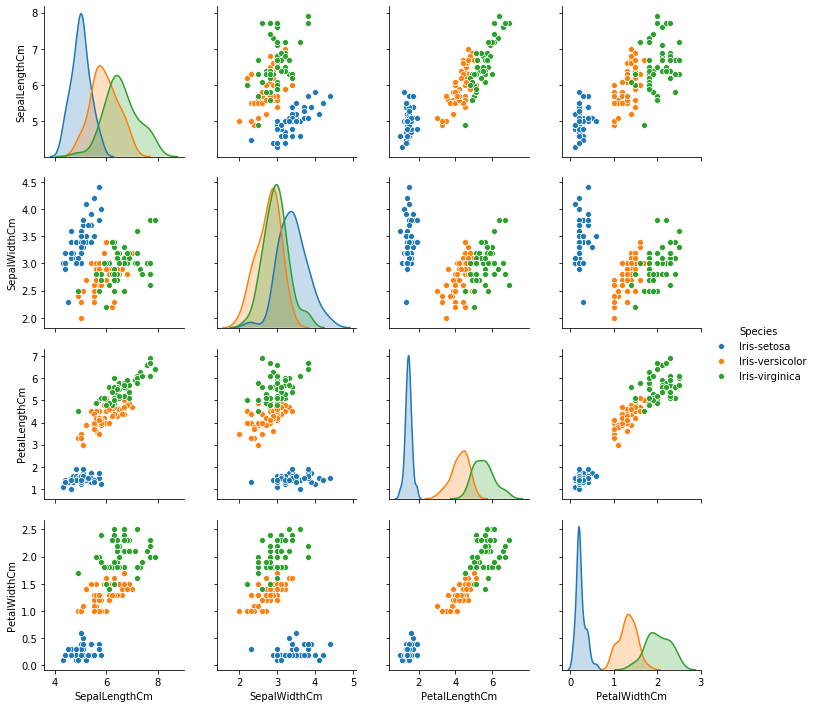

In [59]:
sb.pairplot(data=iris.drop('IrisId', axis=1), hue='Species')

This graph is an example of both a correllation matrix and a pair plot. A correlation matrix shows us the relationships between variables graphically, and a pair plot is just a scatterplot where both axes are variables in our data. This graph lets us quickly compare the utility of variable combinations in trying to predict the species of a given iris based only on our 4 observed variables. Notice how easy it was to generate with Seaborn!